In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

from numbers import Real

from rent_vs_buy.rent import rent, RentConfiguration
from rent_vs_buy.buy import buy, BuyConfiguration

In [3]:
# this cell is tagged 'parameters'

years = 5

# basic parameters

home_price = 1100000
downpayment = 20.0
mortgage_rate = 3.0
term = 25

# speculative parameters

house_price_appreciation = 2.0
return_on_investment = 4.0
inflation = 2.0

# costs

city = "vancouver"
maintenance = 100
strata_fee = 615
utilities = 100
homeowner_insurance = 100 # monthly

# renter costs

monthly_rent = 2800
rent_increase = 2.0
deposit = 0.5*monthly_rent
renter_insurance = 15
utilities = 50

In [4]:
buy_config = BuyConfiguration(
    years=years,
    price=home_price,
    downpayment=downpayment,
    mortgage_rate=mortgage_rate,
    mortgage_term=term,
    appreciation=house_price_appreciation,
    return_on_investment=return_on_investment,
    inflation=inflation,
    city=city,
    maintenance=maintenance,
    strata_fee=strata_fee,
    utilities=utilities,
    insurance=homeowner_insurance,
)

rent_config = RentConfiguration(
    years=years,
    rent=monthly_rent,
    deposit = deposit,
    rent_increase=rent_increase,
    return_on_investment=return_on_investment,
    inflation=inflation,
    utilities=50
)


In [5]:
net_buy_cost = buy(
    buy_config,
    report=True
)

Initial Costs: $254,750
  Down Payment: $220,000
  Buyer Commission Cost: $14,750
  Property Transfer Tax: $20,000
Recurring Costs: $318,400
  Property Taxes: $14,280
  Maintenance: $6,307
  Insurance: $6,307
  Utilities: $3,154
  Strata Fees: $38,789
  Mortgage Payments: $249,564
Opportunity Costs: $87,982
Proceeds: $-427,450
  Selling Price: $-1,214,489
  Seller Commission: $34,862
  Mortgage Balance: $752,177
Net Cost: $233,683


In [6]:
net_rent_cost = rent(
    parameters=rent_config,
    report=True,
)

Initial Costs: $1,400
Recurring Costs: $176,677
Opportunity Costs: $18,498
Proceeds: $-1,400
Net Cost: $195,176


# Sweep the number of years

Let's check how long before it makes sense to buy

In [7]:
def compare():

    max_years = 20

    years = np.arange(1,max_years,1/4)
    rent_costs, buy_costs = np.zeros(len(years)), np.zeros(len(years))

    for i, y in enumerate(years):
        rent_config.years = y
        buy_config.years = y

        rent_costs[i] = rent(rent_config)
        buy_costs[i] = buy(buy_config)

    diff = rent_costs-buy_costs
    decision_point = np.argmin(np.abs(diff))
    d_years = years[decision_point]
    fig = go.Figure()
    fig.add_trace(
        go.Bar(x=years, y=diff, name="Rent Cost - Buy Cost")
    )
    fig.add_trace(
        go.Scatter(x=[d_years,d_years], y=[min(diff),max(diff)], mode="lines", line=dict(dash="dash"), name="Threshold")
    )
    fig.update_layout(
        title=f"Buy Threshold at {d_years:.2f} years", 
        xaxis=dict(title="Years",range=[1,max_years]), 
        yaxis=dict(title="Net Advantage of Buying ($)"),
    )
    return fig


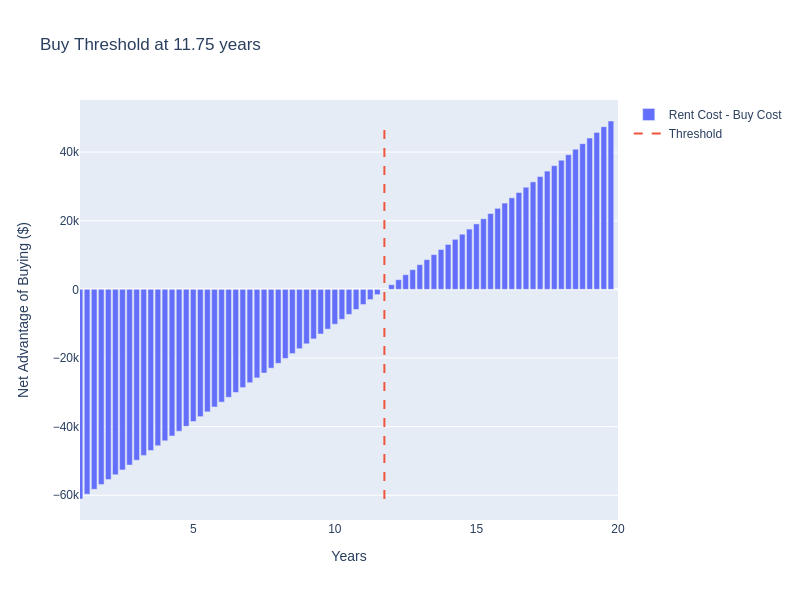

In [8]:
fig = compare()
fig.show(renderer="png", width=800, height=600)